In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import math

import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics

from scipy.special import legendre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Reading CSV

In [2]:
df = pd.read_csv('all_matches_final.csv')

In [3]:
df.describe()

,draw_size,tourney_date,match_num,Player1_id,Player1_seed,Player1_ht,Player1_age,Player1_rank,Player1_rank_points,Player2_id,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,y
count,91957.000000,9.195700e+04,91957.000000,91957.000000,29123.000000,85269.000000,91768.000000,88574.000000,88574.000000,91957.000000,...,82354.000000,82354.000000,82354.000000,82354.000000,82354.000000,82354.000000,82354.00000,82354.00000,82354.000000,92020.000000
mean,52.479866,2.003720e+07,44.643138,103514.236785,7.330907,185.164573,25.727980,100.478741,1212.180516,103642.756767,...,4.756587,3.513721,80.730808,47.684411,31.641560,15.024455,12.04630,4.81055,8.762027,0.500000
std,37.929683,8.063131e+04,69.700276,3579.987407,6.402888,6.706831,3.685990,158.240459,1680.863174,4637.426335,...,4.598634,2.628285,29.509406,19.369342,14.430257,7.259284,4.19923,3.27229,4.125754,0.500003
min,4.000000,1.990123e+07,1.000000,100282.000000,1.000000,160.000000,14.762491,1.000000,0.000000,100284.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-6.00000,0.000000,0.000000
25%,32.000000,1.997011e+07,8.000000,102000.000000,3.000000,180.000000,23.019849,25.000000,430.000000,101990.000000,...,2.000000,2.000000,59.000000,34.000000,21.000000,10.000000,9.00000,2.00000,6.000000,0.000000
50%,32.000000,2.003091e+07,21.000000,103252.000000,6.000000,185.000000,25.538672,58.000000,729.000000,103176.000000,...,4.000000,3.000000,75.000000,44.000000,29.000000,14.000000,11.00000,4.00000,8.000000,0.500000
75%,64.000000,2.011012e+07,41.000000,104468.000000,9.000000,190.000000,28.221766,105.000000,1272.000000,104386.000000,...,7.000000,5.000000,96.000000,58.000000,39.000000,19.000000,15.00000,7.00000,11.000000,1.000000
max,128.000000,2.018092e+07,701.000000,208029.000000,35.000000,208.000000,43.655031,2101.000000,16950.000000,207973.000000,...,103.000000,26.000000,489.000000,328.000000,284.000000,101.000000,91.00000,28.00000,35.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92020 entries, 0 to 92019
Data columns (total 50 columns):
tourney_id             91957 non-null object
tourney_name           91957 non-null object
surface                91839 non-null object
draw_size              91957 non-null float64
tourney_level          91957 non-null object
tourney_date           91957 non-null float64
match_num              91957 non-null float64
Player1_id             91957 non-null float64
Player1_seed           29123 non-null float64
Player1_entry          14376 non-null object
Player1_name           91957 non-null object
Player1_hand           91941 non-null object
Player1_ht             85269 non-null float64
Player1_ioc            91957 non-null object
Player1_age            91768 non-null float64
Player1_rank           88574 non-null float64
Player1_rank_points    88574 non-null float64
Player2_id             91957 non-null float64
Player2_seed           28172 non-null float64
Player2_entry          14

### Betting Data as Numeric Features

In [5]:
players = ['Player1_id','Player1_name','Player2_id','Player2_name']

to_drop = ['tourney_id','tourney_date','score']

cat_cols = ['tourney_name','surface','draw_size','tourney_level','Player1_entry','Player1_hand','Player1_ioc',
            'Player2_entry','Player2_hand','Player2_ioc','best_of','round']


num_cols = ['match_num','Player1_seed','Player1_ht','Player1_age','Player1_rank','Player1_rank_points',
            'Player2_seed','Player2_ht','Player2_age','Player2_rank','Player2_rank_points','minutes','w_ace','w_df',
            'w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn',
            'l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced']

### Dropping Irrelevant Features

In [6]:
df = df.drop(to_drop, axis=1)

### Replacing Missing Values

In [7]:
for i in cat_cols:
    df[i] = df[i].replace(np.NaN, df[i].mode()[0])

In [8]:
for i in num_cols:
    print(i)
    df[i] = df[i].replace(np.NaN,df[i].mean())

match_num
Player1_seed
Player1_ht
Player1_age
Player1_rank
Player1_rank_points
Player2_seed
Player2_ht
Player2_age
Player2_rank
Player2_rank_points
minutes
w_ace
w_df
w_svpt
w_1stIn
w_1stWon
w_2ndWon
w_SvGms
w_bpSaved
w_bpFaced
l_ace
l_df
l_svpt
l_1stIn
l_1stWon
l_2ndWon
l_SvGms
l_bpSaved
l_bpFaced


### convert categorical data to numeric

In [9]:
def convertCatToNum(dff):
    dff_new = pd.get_dummies(dff, columns=cat_cols) 
    return dff_new

In [10]:
df = convertCatToNum(df)
df.head()

,match_num,Player1_id,Player1_seed,Player1_name,Player1_ht,Player1_age,Player1_rank,Player1_rank_points,Player2_id,Player2_seed,...,best_of_5.0,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,279.0,105413.0,7.330907,Andrej Martin,180.0,27.822040,149.0,372.0,104797.0,7.257774,...,0,0,0,0,0,0,1,0,0,0
1,103.0,104269.0,7.330907,Fernando Verdasco,188.0,21.787817,48.0,770.0,104925.0,7.257774,...,1,0,0,0,0,0,1,0,0,0
2,5.0,101733.0,4.000000,Jan Siemerink,183.0,26.732375,17.0,1530.0,102025.0,7.257774,...,0,0,0,0,0,0,1,0,0,0
3,27.0,103103.0,7.000000,Dominik Hrbaty,183.0,24.678987,44.0,772.0,103909.0,7.257774,...,0,0,0,1,0,0,0,0,0,0
4,19.0,104379.0,7.330907,Todd Reid,180.0,20.010951,129.0,315.0,103693.0,7.257774,...,0,0,0,0,0,0,0,1,0,0


### Normalize numeric features

In [11]:
def normalize(dff,col_name_list):
    result = dff.copy()
    for feature_name in col_name_list:
        max_value = dff[feature_name].max()
        min_value = dff[feature_name].min()
        result[feature_name] = (dff[feature_name] - min_value) / (max_value - min_value)
    return result


df = normalize(df,num_cols)
df.head()

,match_num,Player1_id,Player1_seed,Player1_name,Player1_ht,Player1_age,Player1_rank,Player1_rank_points,Player2_id,Player2_seed,...,best_of_5.0,round_BR,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,0.397143,105413.0,0.186203,Andrej Martin,0.416667,0.452004,0.070476,0.021947,104797.0,0.184052,...,0,0,0,0,0,0,1,0,0,0
1,0.145714,104269.0,0.186203,Fernando Verdasco,0.583333,0.243154,0.022381,0.045428,104925.0,0.184052,...,1,0,0,0,0,0,1,0,0,0
2,0.005714,101733.0,0.088235,Jan Siemerink,0.479167,0.414290,0.007619,0.090265,102025.0,0.184052,...,0,0,0,0,0,0,1,0,0,0
3,0.037143,103103.0,0.176471,Dominik Hrbaty,0.479167,0.343220,0.020476,0.045546,103909.0,0.184052,...,0,0,0,1,0,0,0,0,0,0
4,0.025714,104379.0,0.186203,Todd Reid,0.416667,0.181655,0.060952,0.018584,103693.0,0.184052,...,0,0,0,0,0,0,0,1,0,0


C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


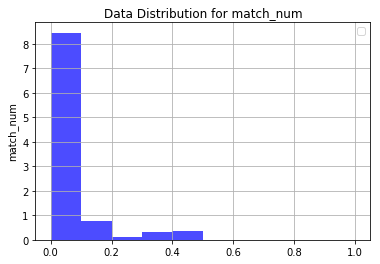

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


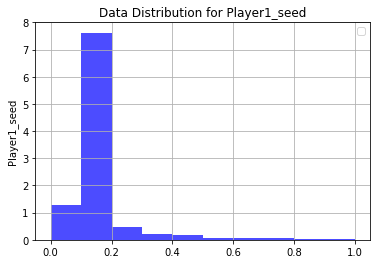

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


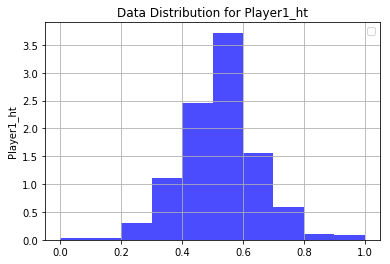

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


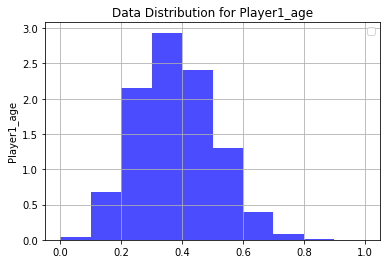

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


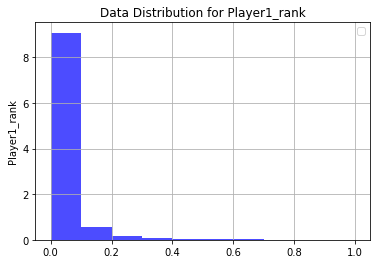

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


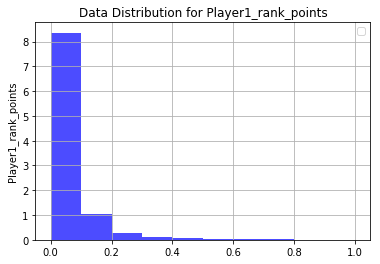

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


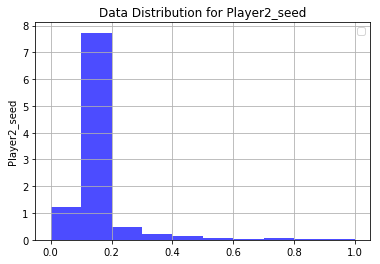

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


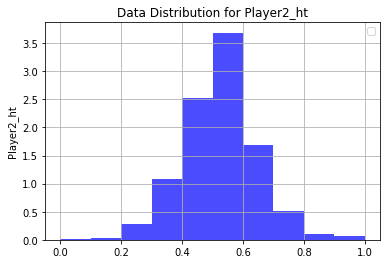

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


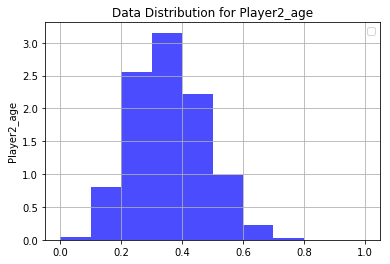

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


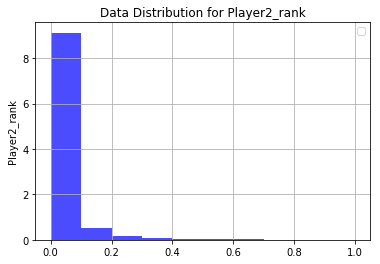

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


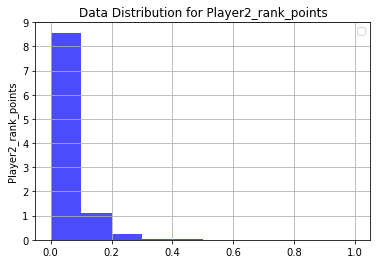

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


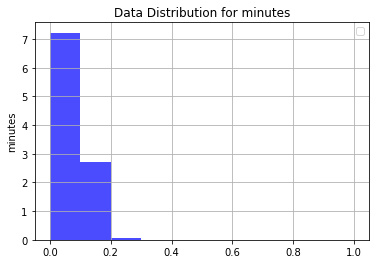

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


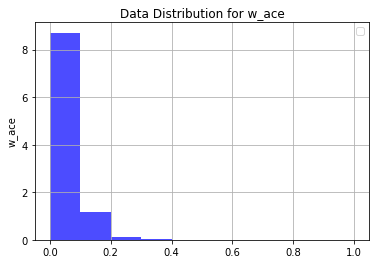

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


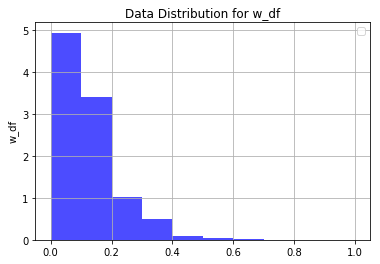

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


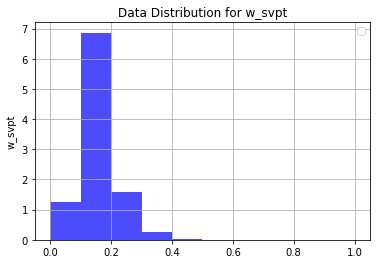

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


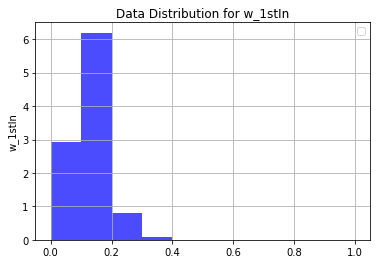

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


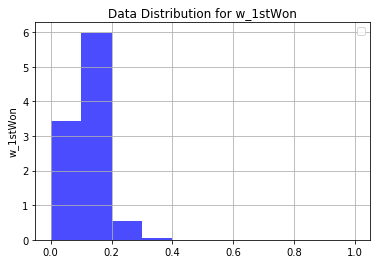

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


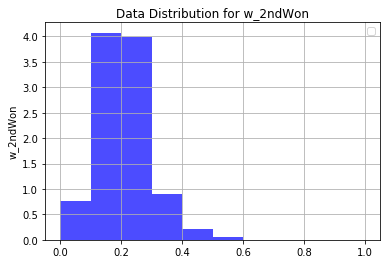

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


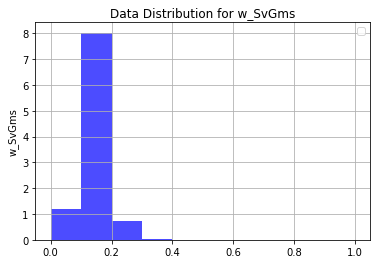

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


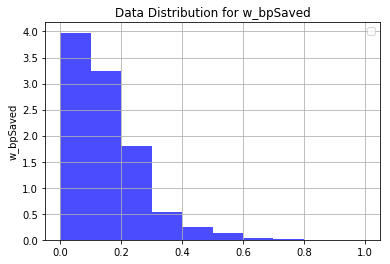

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


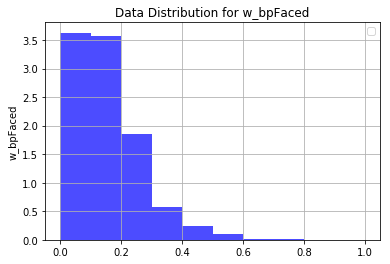

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


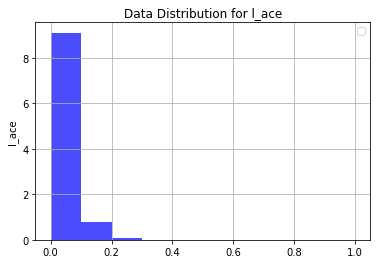

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


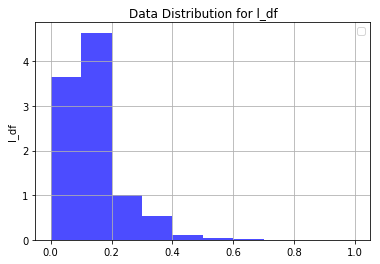

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


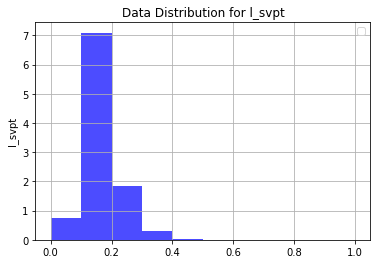

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


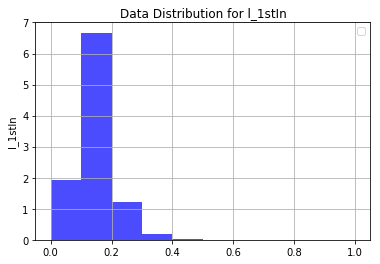

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


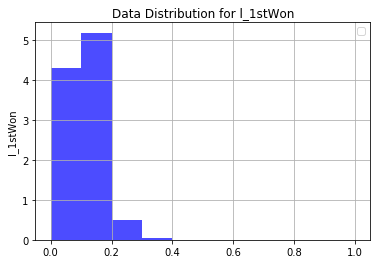

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


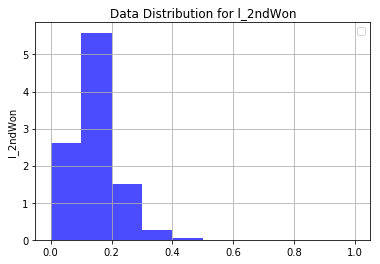

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


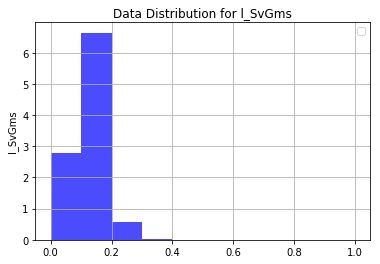

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


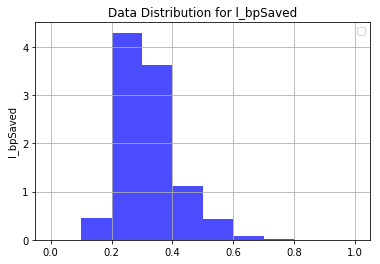

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.


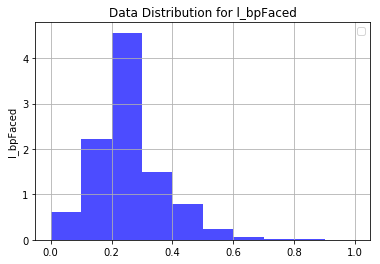

In [12]:
num_bins = 10
for i in num_cols:
    plt.hist(df[i],num_bins,normed=1,facecolor='blue',alpha=0.7)
    plt.ylabel(i)
    plt.title("Data Distribution for " + i)
    plt.legend()
    plt.grid()
    plt.show()

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


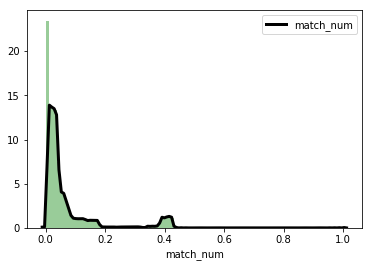

In [13]:
sns.distplot(df[num_cols[0]], color='g', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[0]},
             hist_kws={'alpha': 0.4});

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


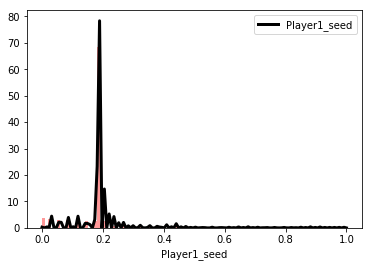

In [14]:
sns.distplot(df[num_cols[1]], color='r', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[1]},
             hist_kws={'alpha': 0.4});

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


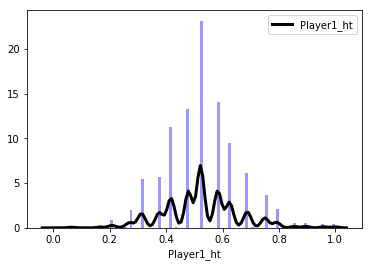

In [15]:
sns.distplot(df[num_cols[2]], color='b', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[2]},
             hist_kws={'alpha': 0.4});

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


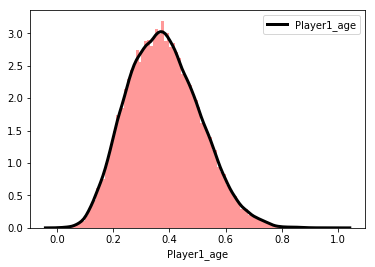

In [16]:
sns.distplot(df[num_cols[3]], color='r', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[3]},
             hist_kws={'alpha': 0.4});

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


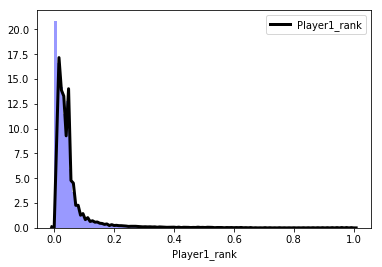

In [17]:
sns.distplot(df[num_cols[4]], color='b', bins=100, kde_kws={"color": "k", "lw": 3, "label": num_cols[4]},
             hist_kws={'alpha': 0.4});

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [19]:
Y = pd.DataFrame(df['y'])
df = df.drop(['y'], axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
X_train = X_train.drop(['Player1_id'], axis=1)
X_train = X_train.drop(['Player1_name'], axis=1)
X_train = X_train.drop(['Player2_id'], axis=1)
X_train = X_train.drop(['Player2_name'], axis=1)

In [21]:
test_names = []
for index, row in X_test.iterrows():
    v = []
    v.append(row['Player1_name'])
    v.append(row['Player2_name'])
    test_names.append(v)

In [22]:
X_test = X_test.drop(['Player1_id'], axis=1)
X_test = X_test.drop(['Player1_name'], axis=1)
X_test = X_test.drop(['Player2_id'], axis=1)
X_test = X_test.drop(['Player2_name'], axis=1)

In [23]:
import operator
def getWinner(preds):
    dic = {}
    
    for i in range(len(preds)):
        w = ''
        if(preds[i]==0):
            w = test_names[i][0]
        else:
            w = test_names[i][1]
        if w in dic:
            dic[w] = dic[w]+1
        else:
            dic[w] = 1
    winner = max(dic.items(), key=operator.itemgetter(1))[0]
    return winner

## RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
def randomForest(est,dep):
    print("Random Forest")
    rdforest = RandomForestClassifier(n_estimators=est,max_depth=dep)
    rdforest.fit(X_train, y_train)
    rdpreds = rdforest.predict(X_test)
    print ("\tMean Squared Error: ",metrics.mean_squared_error(y_test,rdpreds))
    print ("\tR2 Score: ",metrics.r2_score(y_test,rdpreds))
    print ("\tTraining Accuracy: ",rdforest.score(X_train, y_train)*100)
    print ("\tTest Accuracy: ",metrics.accuracy_score(np.round(y_test),np.round(rdpreds))*100)
    return rdpreds

In [25]:
rf_preds = randomForest(140,30)
print("Winner: ",getWinner(rf_preds))

Random Forest


C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


	Mean Squared Error:  0.12836302565284685
	R2 Score:  0.4865155560793474
	Training Accuracy:  96.94743159294762
	Test Accuracy:  87.16369743471532
Winner:  Fabrice Santoro


## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
def logisticRegression(c):
    print("Logistic Regression")
    clf = LogisticRegression(penalty = 'l2', C = c,random_state = 0,solver='sag')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)*100
    print ("\tMean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
    print ("\tR2 Score:",metrics.r2_score(y_test,y_pred))
    print ("\tTraining Accuracy: ",clf.score(X_train, y_train)*100)
    print("\tTest Accuracy: ",acc)
    return y_pred
    
    

In [27]:
lr_preds = logisticRegression(95)
print("Winner: ",getWinner(lr_preds))

Logistic Regression


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


	Mean Squared Error: 0.1092304145947904
	R2 Score: 0.5630508208094396
	Training Accuracy:  89.52849009780546
	Test Accuracy:  89.07695854052096
Winner:  Andreas Seppi


## Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier
def NeuralNetwork(hl,iterations,Alpha,optimizer):
    print("Neural Network")
    clfmlp = MLPClassifier(hidden_layer_sizes=hl, max_iter=iterations, alpha=Alpha,
                     solver=optimizer, verbose=10,  random_state=21,tol=0.000000001)
    clfmlp.fit(X_train, y_train)
    mlp_preds = clfmlp.predict(X_test)
    print("mlp_preds: ",mlp_preds)
    print ("\tMean Squared Error: ",metrics.mean_squared_error(y_test,mlp_preds))
    print ("\tR2 Score: ",metrics.r2_score(y_test,mlp_preds))
    print ("\tTraining Accuracy: ",clfmlp.score(X_train, y_train)*100)
    print ("\tTest Accuracy: ",metrics.accuracy_score(np.round(y_test),np.round(mlp_preds))*100)
    return mlp_preds
    

In [29]:
hidden_layer = (100,100,100)
iterations = 500
alpha = 0.0001
opt = 'adam'
mlpreds = NeuralNetwork(hidden_layer,iterations,alpha,opt)
print("Winner: ",getWinner(lr_preds))

Neural Network


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.35859207
Iteration 2, loss = 0.24628658
Iteration 3, loss = 0.21589772
Iteration 4, loss = 0.20071387
Iteration 5, loss = 0.18805685
Iteration 6, loss = 0.17977184
Iteration 7, loss = 0.16694553
Iteration 8, loss = 0.16046876
Iteration 9, loss = 0.15155859
Iteration 10, loss = 0.14414165
Iteration 11, loss = 0.13700504
Iteration 12, loss = 0.13115399
Iteration 13, loss = 0.12497110
Iteration 14, loss = 0.11814265
Iteration 15, loss = 0.11544081
Iteration 16, loss = 0.10819804
Iteration 17, loss = 0.10381094
Iteration 18, loss = 0.10016148
Iteration 19, loss = 0.09437833
Iteration 20, loss = 0.08969916
Iteration 21, loss = 0.08808914
Iteration 22, loss = 0.08276787
Iteration 23, loss = 0.08042439
Iteration 24, loss = 0.07544669
Iteration 25, loss = 0.07165453
Iteration 26, loss = 0.07073701
Iteration 27, loss = 0.06820196
Iteration 28, loss = 0.06406655
Iteration 29, loss = 0.05756629
Iteration 30, loss = 0.06204408
Iteration 31, loss = 0.05695836
Iteration 32, los

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

def naiveBayes():
    print("Naive Bayes")
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print ("\tMean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
    print ("\tR2 Score: ",metrics.r2_score(y_test,y_pred))
    print ("\tTraining Accuracy: ",gnb.score(X_train, y_train)*100)
    print("\tTest Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100)
    return y_pred

In [31]:
nb_preds = naiveBayes()
print("Winner: ",getWinner(nb_preds))

Naive Bayes


C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


	Mean Squared Error:  0.33440906246912766
	R2 Score:  -0.33772050487794436
	Training Accuracy:  66.32767261933726
	Test Accuracy:  66.55909375308723
Winner:  Roger Federer
